In [2]:
!pip install librosa
!pip install ipython
!pip install googletrans==4.0.0-rc1
!pip install transformers
!pip install torch
!pip install sentencepiece
!pip install pyttsx3
!pip install wave
!pip install pygame
!pip install gTTS
!pip install soundfile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.5 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=d043af3ce38951d1b6ecd40de6ac8ad96d3426bc81a20d31b9c2e1d49525f50a
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninsta

In [45]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
%matplotlib inline
import librosa.display
from IPython.display import Audio
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import skimage.io
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Audio
import numpy as np
import librosa
import librosa.display
import soundfile as sf

# Load the audio file
file_path = "/content/demo-audio.wav"
audio_data, sample_rate = librosa.load(file_path, sr=None)

# Display the audio widget
Audio(data=audio_data, rate=sample_rate)

The sampled audio is returned as a numpy array (time series) and has  (1751702,)  number of samples
The 10 randomly picked consequitive samples of the audio are:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


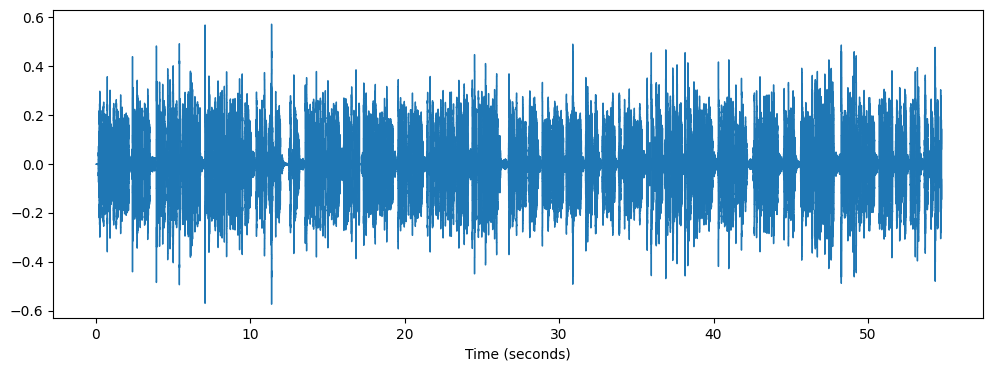

In [46]:
import matplotlib.pyplot as plt

y, sr = librosa.load(file_path, sr=32000)

plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr, x_axis='s')

print("The sampled audio is returned as a numpy array (time series) and has ", y.shape, " number of samples")
print("The 10 randomly picked consequitive samples of the audio are: ", y[3000:3010])

plt.show()

In [47]:
# Size of the Fast Fourier Transform (FFT), which will also be used as the window length
n_fft=1024

# Step or stride between windows. If the step is smaller than the window length, the windows will overlap
hop_length=320

# Specify the window type for FFT/STFT
window_type ='hann'

# Calculate the spectrogram as the square of the complex magnitude of the STFT
spectrogram_librosa = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length, win_length=n_fft, window=window_type)) ** 2

print("The shape of spectrogram_librosa is: ", spectrogram_librosa.shape)
print("The size of the spectrogram is ([(frame_size/2) + 1 x number of frames])")
print("The frame size that we have specified is the number of samples to consider for the STFT. In our case, it is equal to the n_fft",n_fft, " samples")
print("The number of frames depends on the total length of the sampled signal, the number of samples in each frame and the hop length.",hop_length)

The shape of spectrogram_librosa is:  (513, 5475)
The size of the spectrogram is ([(frame_size/2) + 1 x number of frames])
The frame size that we have specified is the number of samples to consider for the STFT. In our case, it is equal to the n_fft 1024  samples
The number of frames depends on the total length of the sampled signal, the number of samples in each frame and the hop length. 320


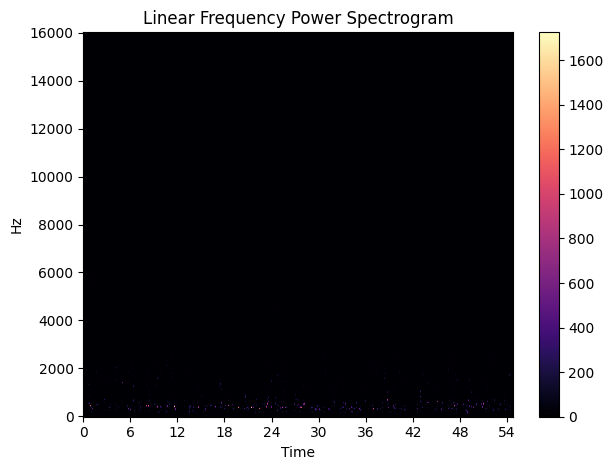

In [48]:
librosa.display.specshow(spectrogram_librosa, sr=sr, x_axis='time', y_axis='linear',hop_length=hop_length)
plt.title('Linear Frequency Power Spectrogram')
plt.colorbar()
plt.tight_layout()
plt.show()

The shape of mel spectrogram is:  (64, 5475)


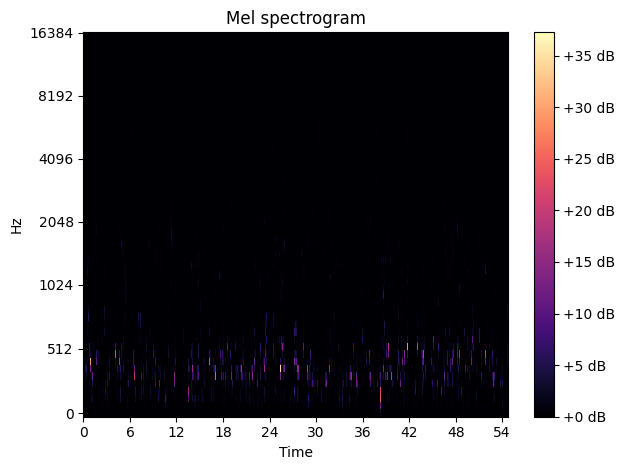

In [49]:
mel_bins = 64 # Number of mel bands
fmin = 0
fmax= None
Mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, win_length=n_fft, window=window_type, n_mels = mel_bins, power=2.0)
print("The shape of mel spectrogram is: ", Mel_spectrogram.shape)

librosa.display.specshow(Mel_spectrogram, sr=sr, x_axis='time', y_axis='mel',hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

The shape of Log Mel spectrogram is:  (64, 5475)


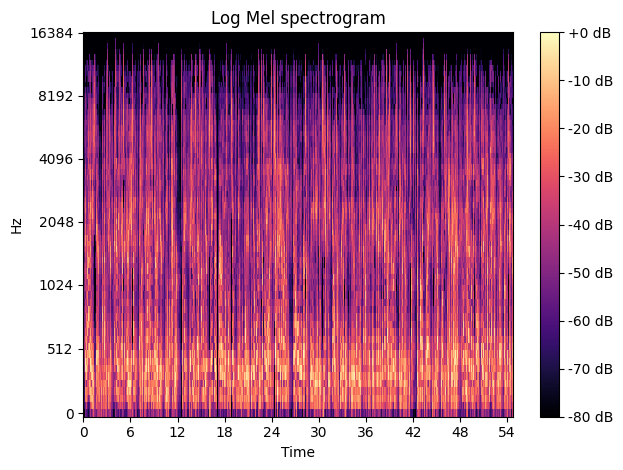

In [50]:
mel_spectrogram_db = librosa.power_to_db(Mel_spectrogram, ref=np.max)
print("The shape of Log Mel spectrogram is: ", mel_spectrogram_db.shape)
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel',hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('Log Mel spectrogram')
plt.tight_layout()
plt.show()

In [51]:
def preprocess_audio(input_path, output_path, target_sr=22050):
    try:
        # Load the audio file using librosa
        audio, sr = librosa.load(input_path, sr=None)

        # Resample the audio to the target sampling rate if necessary
        if sr != target_sr:
            audio = librosa.resample(audio, orig_sr=sr, target_sr=target_sr)

        # Normalize the audio amplitude to the range [-1, 1]
        audio /= max(abs(audio))

        # Save the preprocessed audio
        sf.write(output_path, audio, target_sr, subtype='PCM_16')

        print("Audio preprocessing completed successfully!")
    except Exception as e:
        print(f"Error occurred during audio preprocessing: {e}")

# Example usage:
input_audio_path = "/content/demo-audio.wav"
output_audio_path = "/content/preprocessed_audio.wav"
preprocess_audio(input_audio_path, output_audio_path, target_sr=22050)

Audio preprocessing completed successfully!


In [52]:
from transformers import Wav2Vec2ForCTC, Wav2Vec2Tokenizer
import torch

def speech_to_text_wav2vec(input_audio_path):
    try:
        # Load the pre-trained Wav2Vec model and tokenizer
        model_name = "facebook/wav2vec2-base-960h"
        model = Wav2Vec2ForCTC.from_pretrained(model_name)
        tokenizer = Wav2Vec2Tokenizer.from_pretrained(model_name)

        # Load and process the input audio
        audio_input, _ = librosa.load(input_audio_path, sr=16000)
        input_values = tokenizer(audio_input, return_tensors="pt").input_values

        # Perform speech-to-text recognition
        with torch.no_grad():
            logits = model(input_values).logits
            predicted_ids = torch.argmax(logits, dim=-1)

        # Decode predicted_ids to text using the tokenizer
        transcription = tokenizer.batch_decode(predicted_ids)

        return transcription[0]
    except Exception as e:
        print(f"Error occurred during speech recognition: {e}")
        return None

# Example usage:
input_audio_path = "/content/demo-audio.wav"
recognized_text = speech_to_text_wav2vec(input_audio_path)
print("Recognized Text:", recognized_text)


Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Wav2Vec2CTCTokenizer'. 
The class this function is called from is 'Wav2Vec2Tokenizer'.


Recognized Text: YOU KNOW RATHER THAN BE SCARED BY A JOBLE'S FUTURE I STOOD ID TO RETHINK IN AND I SAID I COULD REALLY BE EXCITED BY A JOBLIS FUTURE BECAUSE I CAN FINALLY SEE A DAN UNDER FIFTY YEARS WHEN PEOPLE DON'T HAVE TO WORK FOR PAY BECAUSE HUMANS HAVE LABORED FOR THOUSANDS OF YEARS SLAVES TO THEIR PRIMARILY IN MOSTS OF THE WORLD AND SOON THEY'LL BE ABLE TO DO WHAT THEY WANTED TO DO WHAT THEY WERE BORN TO DO BEFORE SO ONE CAME ALONG AND SAID STOP DOING THAT YOU GOT TO GO EARN A LIVING THIS IS A WHOLE NEW RENAISSANCE THAT WE MAY BE ABLE TO SEE ACTUALLY IN OUR LIFETIME WHERE HUMANS CAN CAN CAN DO WHAT THEY WERE BORN TO DO LIKE ART AND DANCE AND MUSIC AND INVENTION AND CARING FOR OTHERS AND WHATEVER IT IS THAT YOU WANT TO DO NOTHER BEFITS IN STARTS THEY'LL BE POLITICS TO GET IN THE WAY THIS IS NO UTO NOW IT IS A UTOPIA ACTUALLY COME TO THINK OF IT AND WORKING TOGETHER TOWARDS THIS GUAL THIS IS ACTUALLY A GREAT IDEA WHEN WE LOOK AT IT FROM THIS VANAGED


In [53]:
from googletrans import Translator

def translate_english_to_hindi(english_text):
    try:
        translator = Translator()
        translated_text = translator.translate(english_text, src='en', dest='hi')
        return translated_text.text
    except Exception as e:
        print(f"Error occurred during translation: {e}")
        return None

if __name__ == "__main__":
    english_text = recognized_text

    translated_text = translate_english_to_hindi(english_text)
    if translated_text:
        print("Translated Text:", translated_text)
    else:
        print("Translation failed.")

Translated Text: आप जानते हैं कि एक जॉबल के भविष्य से डरने के बजाय मैं पुनर्विचार करने के लिए आईडी खड़ा था और मैंने कहा कि मैं वास्तव में एक भूत भविष्य से उत्साहित हो सकता हूं क्योंकि मैं अंत में पचास साल से कम समय से एक डैन देख सकता हूं जब लोगों को भुगतान के लिए काम करने की आवश्यकता नहीं है क्योंकि मनुष्य क्योंकि मनुष्य है क्योंकि मनुष्यहजारों साल के लिए दासों को उनके मुख्य रूप से दुनिया के अधिकांश लोगों में ले जाया गया है और जल्द ही वे वही करने में सक्षम होंगे जो वे वह करना चाहते थे जो वे करने के लिए पैदा हुए थे, इसलिए एक साथ आया था और कहा कि आपको कमाई करने के लिए बंद कर दिया गयाएक जीवित यह एक नया पुनर्जागरण है जिसे हम वास्तव में अपने जीवनकाल में देख सकते हैं, जहां मनुष्य वह कर सकते हैं जो वे कला और नृत्य और संगीत और आविष्कार और दूसरों की देखभाल करने के लिए पैदा हुए थे और जो कुछ भी आप चाहते हैं वह हैशुरू करने के लिए nother befits करने के लिए वे राजनीति करने के लिए जिस तरह से यह नहीं है कि यह कोई यूटो नहीं है अब यह एक यूटोपिया है जो वास्तव में इसके बारे में सोचने के लिए आता है और इस ग

In [23]:
!pip install pydub

In [31]:
!pip install pyworld

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.0/252.0 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyworld: filename=pyworld-0.3.4-cp310-cp310-linux_x86_64.whl size=863318 sha256=2dd5f34d14008e53ef101890a411941bb014967a401dd09885c707877b2dcae7
  Stored in directory: /root/.cache/pip/wheels/66/09/8a/a1d79b73d59756f66e9bfe55a199840efc7473adb76ddacdfd
Successfully built pyworld


In [54]:
import librosa
import soundfile as sf
from gtts import gTTS
import io
import subprocess

# Load the English audio file
english_audio_path = "/content/demo-audio.wav"
english_audio, sr = librosa.load(english_audio_path)

# Extract the tone of the English audio
english_tone = librosa.feature.tonnetz(y=english_audio)

# Compute the pitch using piptrack
frequencies, magnitudes = librosa.piptrack(y=english_audio)
mean_frequencies = frequencies.mean(axis=1)
english_pitch = mean_frequencies[-1]  # Taking the mean of all frames for the first harmonic

# Translated Hindi text
translated_text = translated_text

# Create a temporary WAV file for gTTS audio
temp_wav_path = 'temp_hindi_audio.wav'
tts = gTTS(translated_text, lang='hi')
tts.save(temp_wav_path)

# Convert WAV to MP3 using FFmpeg
hindi_audio_path = 'hindi_audio.mp3'
subprocess.run(['ffmpeg', '-i', temp_wav_path, '-vn', '-ar', '44100', '-ac', '2', '-b:a', '192k', hindi_audio_path])

# Clean up the temporary WAV file
subprocess.run(['rm', temp_wav_path])

print("Hindi audio generated and saved.")


Hindi audio generated and saved.
